# This should automatically analyze a text file of the data from the gyroscope/accelerometer.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')

In [13]:
path = input('path to file: ')
# also had to delete the first and last row from the .txt file itself

path to file:  C:\Users\mhanr\Desktop\Actual Life\first_try.txt


In [20]:
# turn all the data into numpy arrays
# there is likely a much faster way to do this but I don't care (yet)
all_data = np.genfromtxt(path, delimiter = ' ', skip_footer = 0) 

# for some reason count = all_data[:,0] reads it as a list of nan's
# so I'm just using arange to avoid that
count = np.arange(0,1000, 1) 
timestamp = all_data[:,1]
x_accel_bits = all_data[:,2]
y_accel_bits = all_data[:,3]
z_accel_bits = all_data[:,4]
x_gyro_bits = all_data[:,5]
y_gyro_bits = all_data[:,6]
z_gyro_bits = all_data[:,7]

In [22]:
# make the residual arrays for plotting
x_a_resid = np.array(x_accel_bits - np.average(x_accel_bits))
y_a_resid = np.array(y_accel_bits - np.average(y_accel_bits))
z_a_resid = np.array(z_accel_bits - np.average(z_accel_bits))
x_g_resid = np.array(x_gyro_bits - np.average(x_gyro_bits))
y_g_resid = np.array(y_gyro_bits - np.average(y_gyro_bits))
z_g_resid = np.array(z_gyro_bits - np.average(z_gyro_bits))
print(count.size, x_a_resid.size, z_g_resid.size)

1000 1000 1000


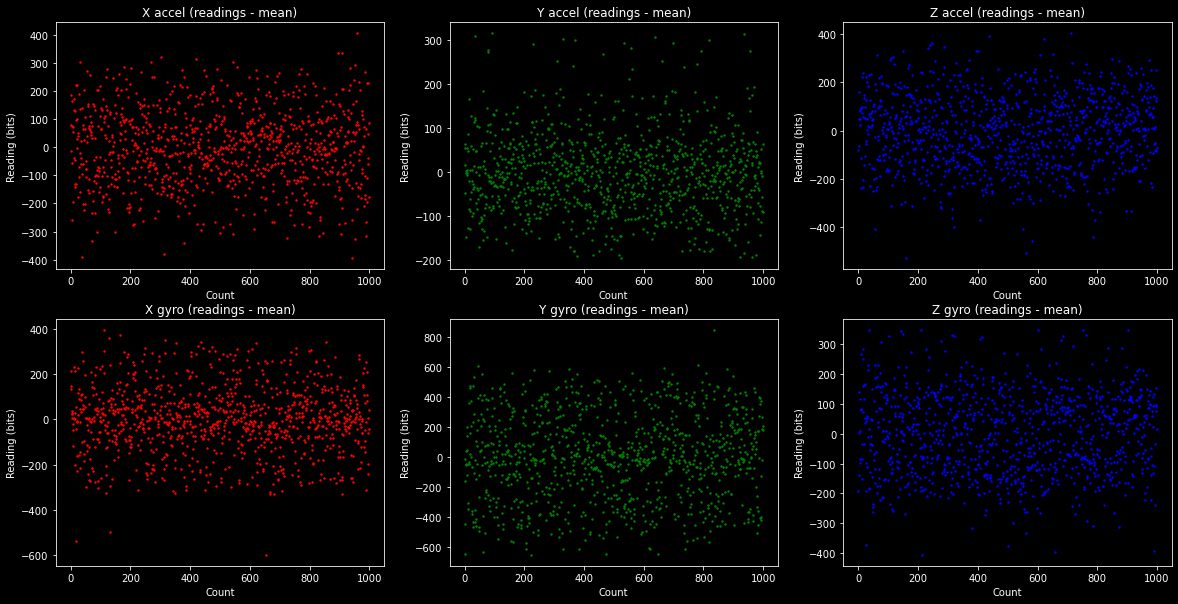

In [23]:
# now make the plots
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].scatter(count, x_a_resid, c = 'r', s= 2)
ax[0,1].scatter(count, y_a_resid, c = 'g', s= 2)
ax[0,2].scatter(count, z_a_resid, c = 'b', s= 2)

ax[1,0].scatter(count, x_g_resid, c = 'r', s = 2)
ax[1,1].scatter(count, y_g_resid, c = 'g', s = 2)
ax[1,2].scatter(count, z_g_resid, c = 'b', s = 2)

ax[0,0].set_title('X accel (readings - mean)')
ax[0,1].set_title('Y accel (readings - mean)')
ax[0,2].set_title('Z accel (readings - mean)')

ax[1,0].set_title('X gyro (readings - mean)')
ax[1,1].set_title('Y gyro (readings - mean)')
ax[1,2].set_title('Z gyro (readings - mean)')

for x in ax.flat:
    x.set(xlabel='Count', ylabel='Reading (bits)')